In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import interpolate as interp
from scipy import signal as sig


In [2]:
x1 = np.arange(7)
x2 = np.linspace(0.2, 5.80, num=20)

In [3]:
y1 = np.random.randint(2, 10, size=x1.size)
y2 = np.ones(x2.shape)

In [4]:
print(x1, x2, y1, y2, sep="\n")

[0 1 2 3 4 5 6]
[0.2        0.49473684 0.78947368 1.08421053 1.37894737 1.67368421
 1.96842105 2.26315789 2.55789474 2.85263158 3.14736842 3.44210526
 3.73684211 4.03157895 4.32631579 4.62105263 4.91578947 5.21052632
 5.50526316 5.8       ]
[7 6 8 8 8 8 2]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
f = interp.interp1d(x1, y1, fill_value="extrapolate")
y2_signal = f(x2)

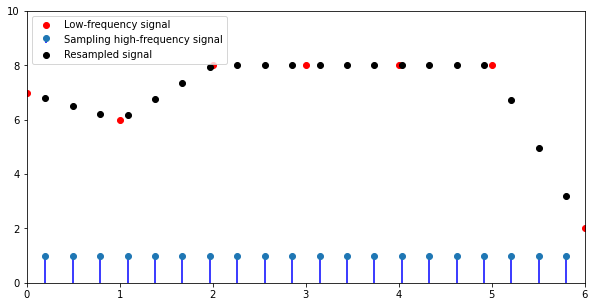

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x1, y1, "ro", label="Low-frequency signal")
ax.stem(x2, y2, "b", label="Sampling high-frequency signal", basefmt=" ")
ax.plot(x2, y2_signal, "ko", label="Resampled signal")

# The legend was not with the right order
handles, labels = ax.get_legend_handles_labels()
order = [0,2,1]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="upper left")

# ax.legend()

ax.set_xlim(0, 6)
ax.set_ylim(0, 10)


fig.savefig("upsampling.jpg")
fig.savefig("upsampling.png")

# DataFrames

In [7]:
lf_sig = {"x": x1}
hf_sig = {"x": x2}

lf_sig["a"] = np.ones(lf_sig["x"].shape)
lf_sig["b"] = np.random.randint(2, 10, size=lf_sig["x"].size)
lf_sig["c"] = np.flipud(lf_sig["b"])
lf_sig["d"] = 9 * np.ones(lf_sig["x"].shape)
lf_sig["e"] = np.random.randint(5, 10, size=lf_sig["x"].size)
lf_sig["f"] = np.flipud(lf_sig["e"])
lf_sig["g"] = np.ones(lf_sig["x"].shape)
lf_sig["h"] = np.arange(lf_sig["x"].size)

In [8]:
lf_sig = pd.DataFrame.from_dict(lf_sig)
hf_sig = pd.DataFrame.from_dict(hf_sig)

In [9]:
lf_sig

x    a  b  c    d  e  f    g  h
0  0  1.0  3  5  9.0  5  6  1.0  0
1  1  1.0  6  7  9.0  7  6  1.0  1
2  2  1.0  9  2  9.0  8  7  1.0  2
3  3  1.0  2  2  9.0  9  9  1.0  3
4  4  1.0  2  9  9.0  7  8  1.0  4
5  5  1.0  7  6  9.0  6  7  1.0  5
6  6  1.0  5  3  9.0  6  5  1.0  6

In [10]:
hf_sig

x
0   0.200000
1   0.494737
2   0.789474
3   1.084211
4   1.378947
5   1.673684
6   1.968421
7   2.263158
8   2.557895
9   2.852632
10  3.147368
11  3.442105
12  3.736842
13  4.031579
14  4.326316
15  4.621053
16  4.915789
17  5.210526
18  5.505263
19  5.800000

In [11]:
sigs_cols = tuple(c for c in "abcdefgh")
sigs_cols

('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h')

In [12]:
fs = {s: interp.interp1d(lf_sig.x, lf_sig[s], fill_value="extrapolate") for s in sigs_cols}

In [13]:
for s, interp_f in fs.items():
    hf_sig[s] = interp_f(hf_sig.x)
hf_sig

x    a         b         c    d         e         f    g         h
0   0.200000  1.0  3.600000  5.400000  9.0  5.400000  6.000000  1.0  0.200000
1   0.494737  1.0  4.484211  5.989474  9.0  5.989474  6.000000  1.0  0.494737
2   0.789474  1.0  5.368421  6.578947  9.0  6.578947  6.000000  1.0  0.789474
3   1.084211  1.0  6.252632  6.578947  9.0  7.084211  6.084211  1.0  1.084211
4   1.378947  1.0  7.136842  5.105263  9.0  7.378947  6.378947  1.0  1.378947
5   1.673684  1.0  8.021053  3.631579  9.0  7.673684  6.673684  1.0  1.673684
6   1.968421  1.0  8.905263  2.157895  9.0  7.968421  6.968421  1.0  1.968421
7   2.263158  1.0  7.157895  2.000000  9.0  8.263158  7.526316  1.0  2.263158
8   2.557895  1.0  5.094737  2.000000  9.0  8.557895  8.115789  1.0  2.557895
9   2.852632  1.0  3.031579  2.000000  9.0  8.852632  8.705263  1.0  2.852632
10  3.147368  1.0  2.000000  3.031579  9.0  8.705263  8.852632  1.0  3.147368
11  3.442105  1.0  2.000000  5.094737  9.0  8.115789  8.557895  1.0  3.442105
12  3.736842  1.0  2.000000  7.157895  9.0  7.526316  8.263158  1.0  3.736842
13  4.031579  1.0  2.157895  8.905263  9.0  6.968421  7.968421  1.0  4.031579
14  4.326316  1.0  3.631579  8.021053  9.0  6.673684  7.673684  1.0  4.326316
15  4.621053  1.0  5.105263  7.136842  9.0  6.378947  7.378947  1.0  4.621053
16  4.915789  1.0  6.578947  6.252632  9.0  6.084211  7.084211  1.0  4.915789
17  5.210526  1.0  6.578947  5.368421  9.0  6.000000  6.578947  1.0  5.210526
18  5.505263  1.0  5.989474  4.484211  9.0  6.000000  5.989474  1.0  5.505263
19  5.800000  1.0  5.400000  3.600000  9.0  6.000000  5.400000  1.0  5.800000

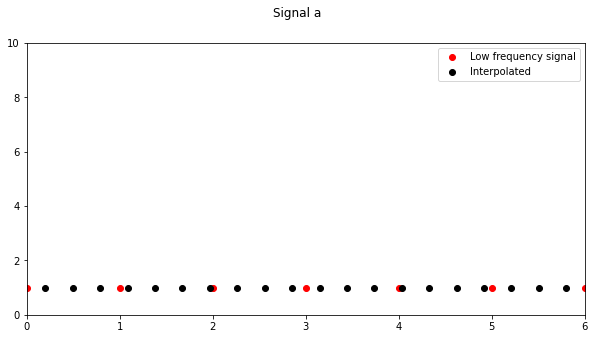

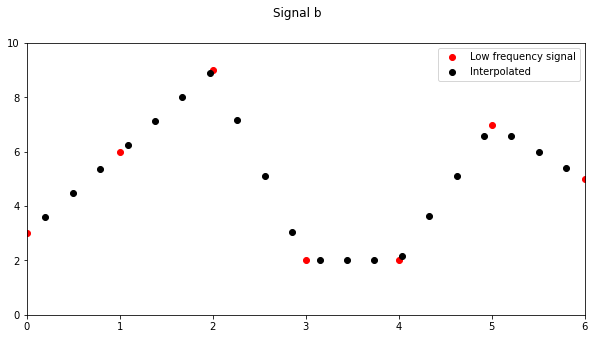

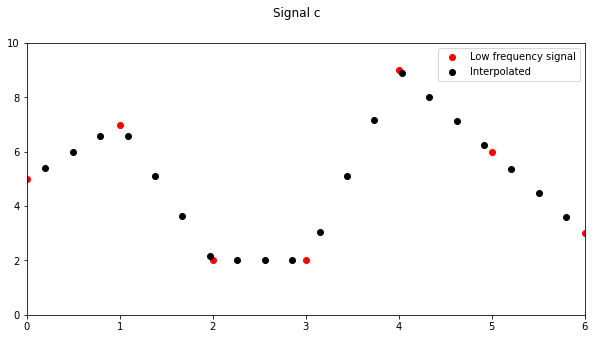

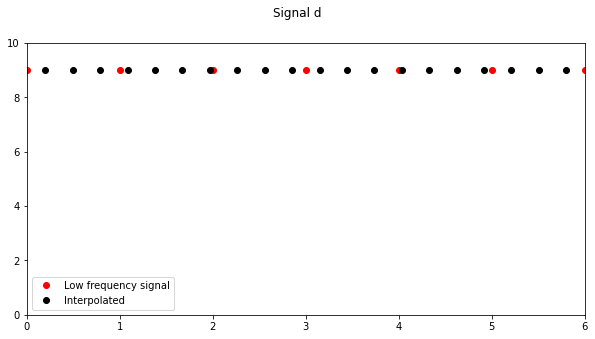

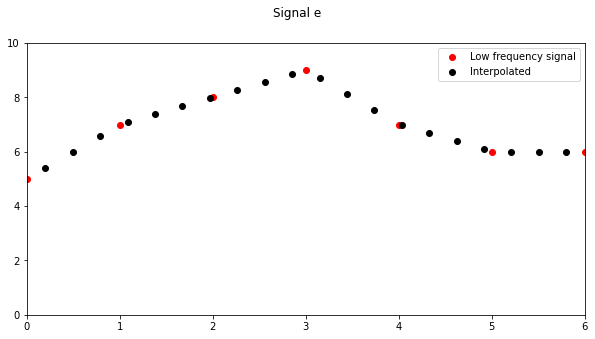

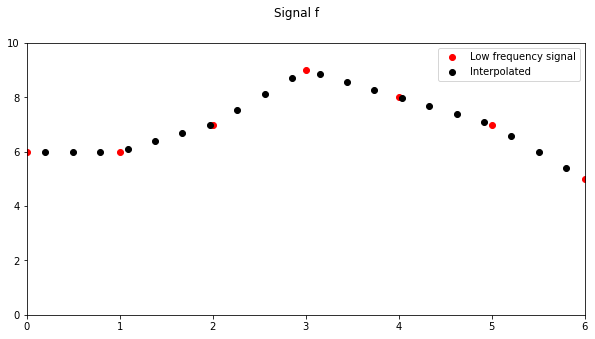

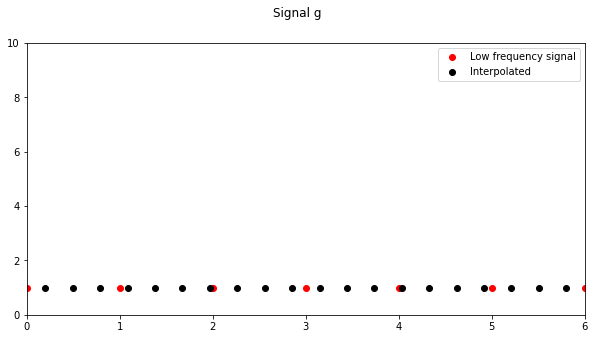

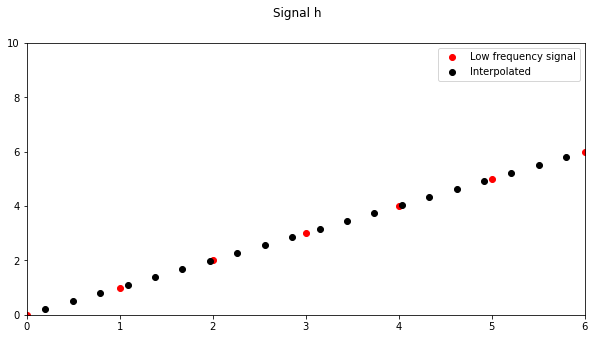

In [14]:
for s in sigs_cols:
    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(lf_sig.x, lf_sig[s], "ro", label="Low frequency signal")
    ax.plot(hf_sig.x, hf_sig[s], "ko", label="Interpolated")

    ax.legend()

    ax.set_xlim(lf_sig.x.min(), lf_sig.x.max())
    ax.set_ylim(0, 10)
    fig.suptitle(f"Signal {s}")

    fig.savefig(f"upsampling/upsampling_{s}.jpg")